In [1]:
%load_ext autoreload
%autoreload 2

# Test noise reduction algorithm and view steps of algorithm

In [2]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
%matplotlib inline

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load data

In [3]:
wav_loc = "../assets/fish.wav"
rate, data= wavfile.read(wav_loc)
data = data/32768.

In [4]:
IPython.display.Audio(data=data, rate=rate)

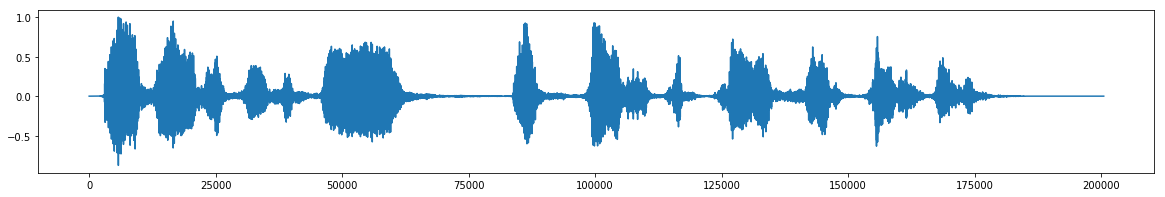

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### add noise

In [6]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

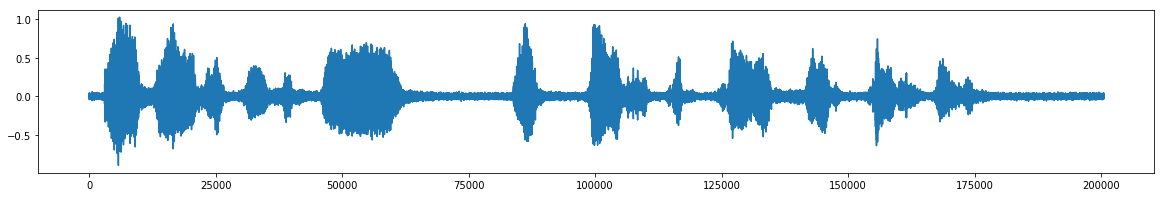

In [7]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [8]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### remove noise

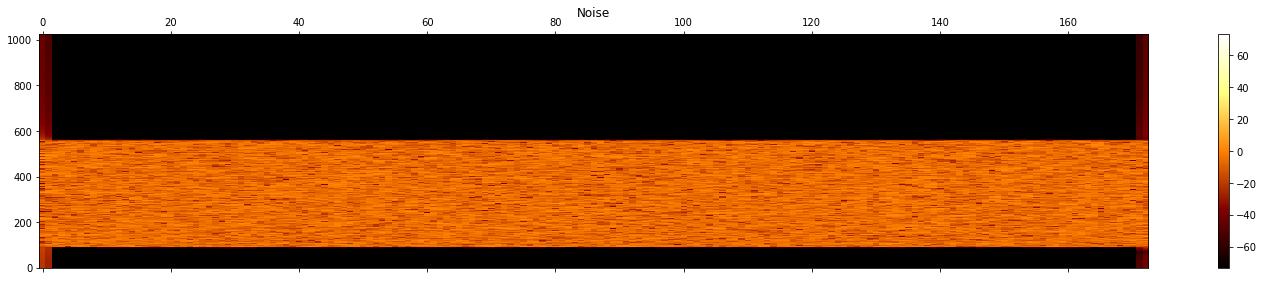

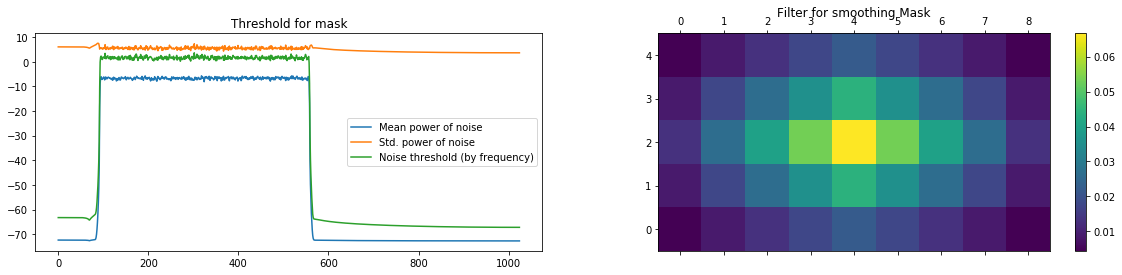

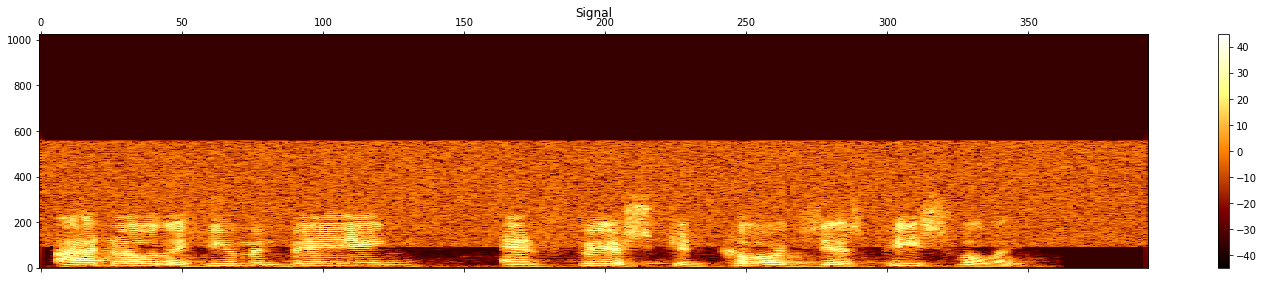

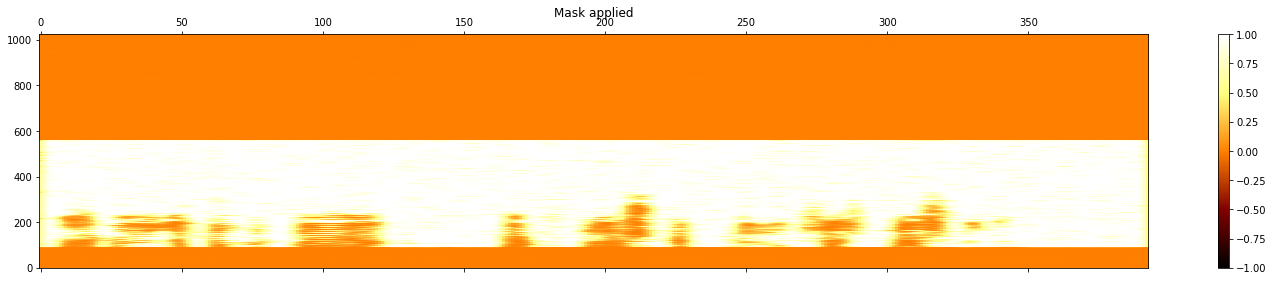

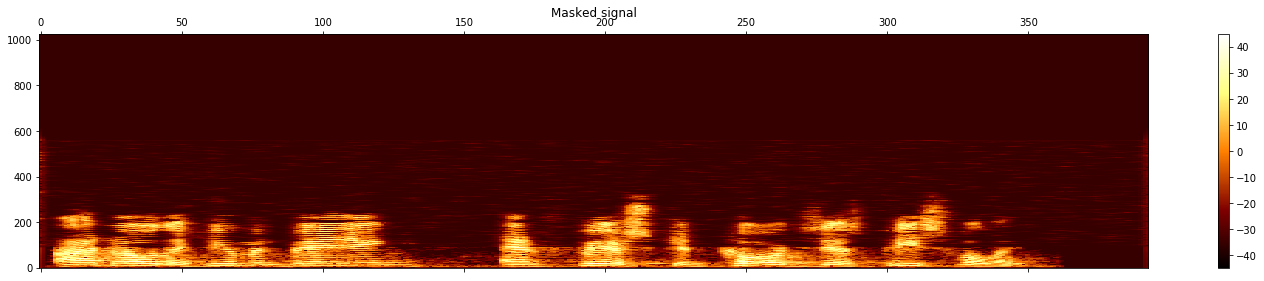

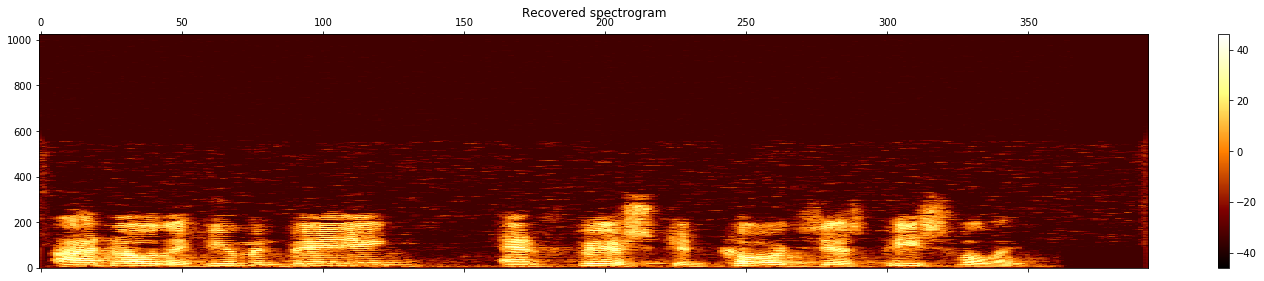

In [9]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, verbose=True)

##### playback recovered audio

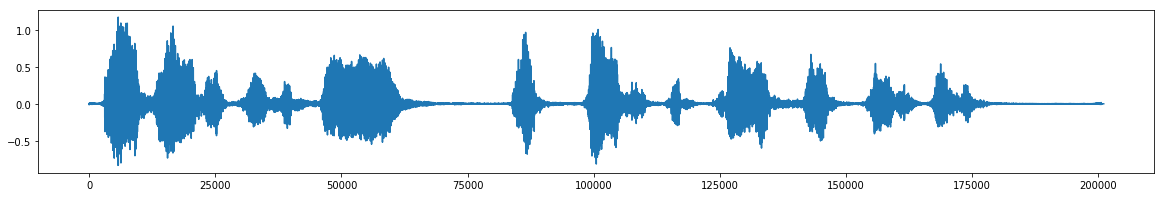

In [10]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [11]:
IPython.display.Audio(data=noise_reduced, rate=rate)

### A more realistic example 

In [12]:
noise_loc = "../assets/cafe_short.wav"
noise_rate, noise_data= wavfile.read(noise_loc)
noise_data = noise_data/32768

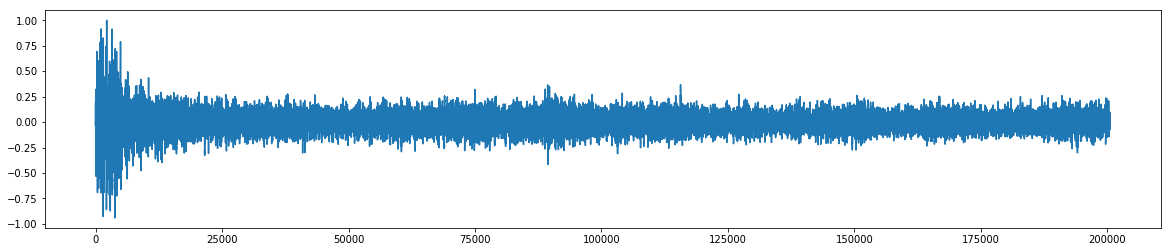

In [13]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [14]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

In [15]:
max(noise_data)

0.999969482421875

### add noise to data

In [16]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

### plot noisy data

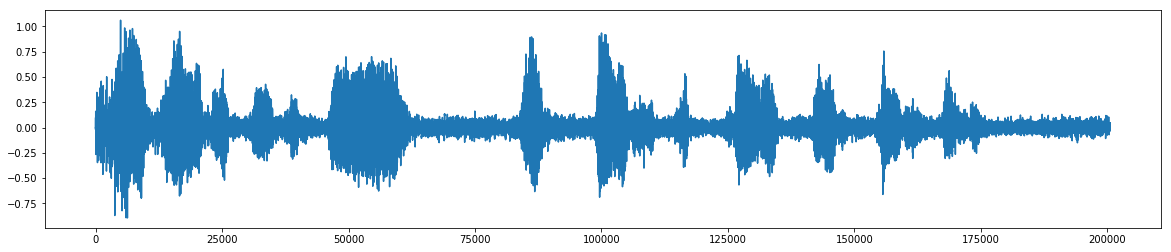

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### reduce noise

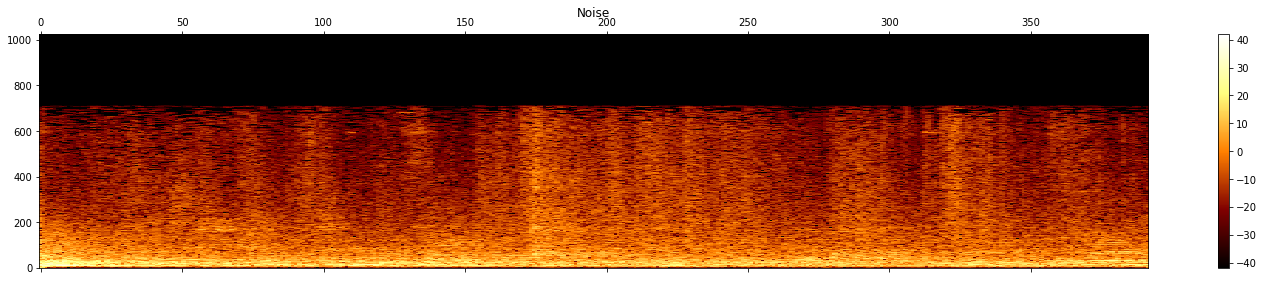

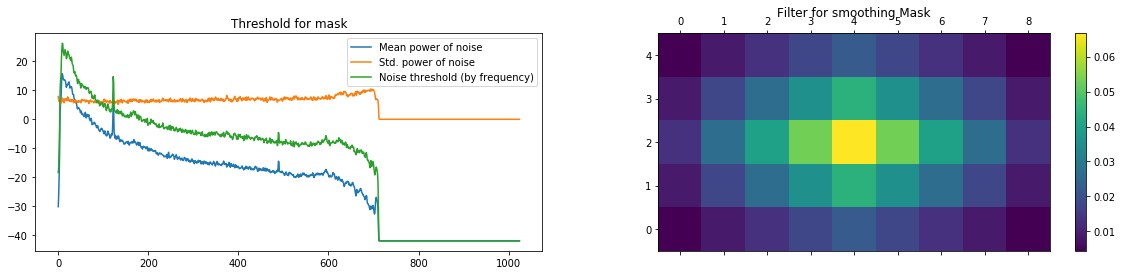

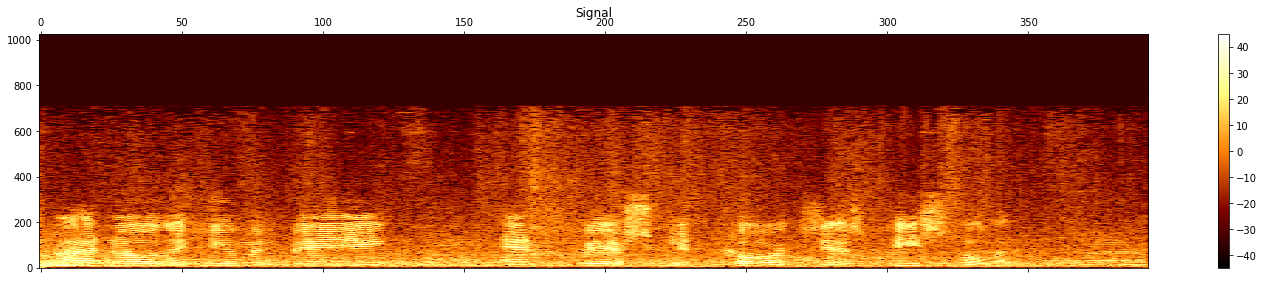

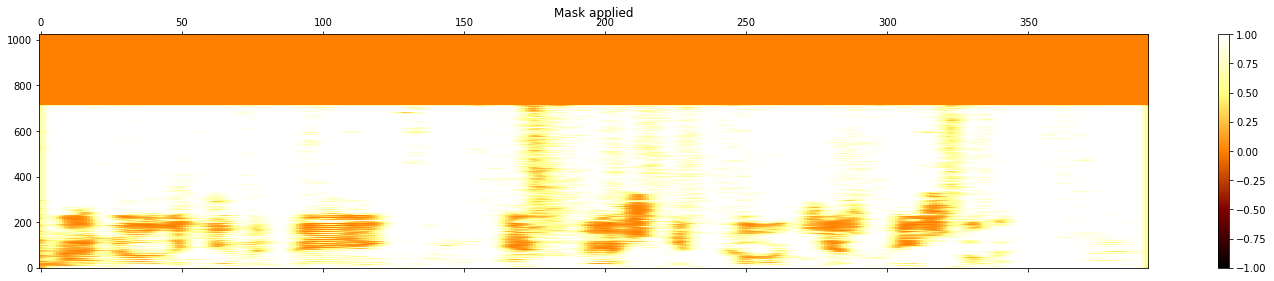

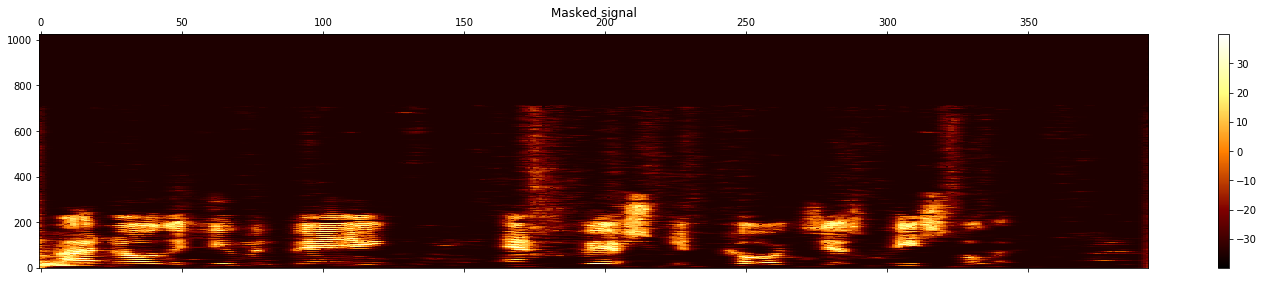

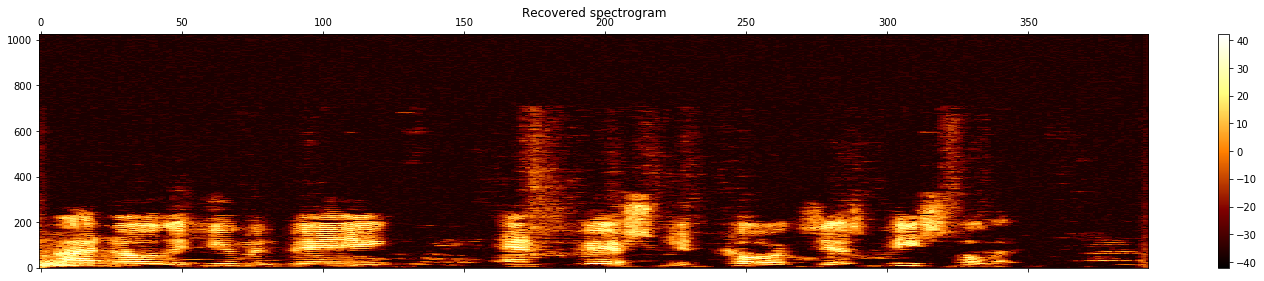

In [18]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

##### playback recovered audio

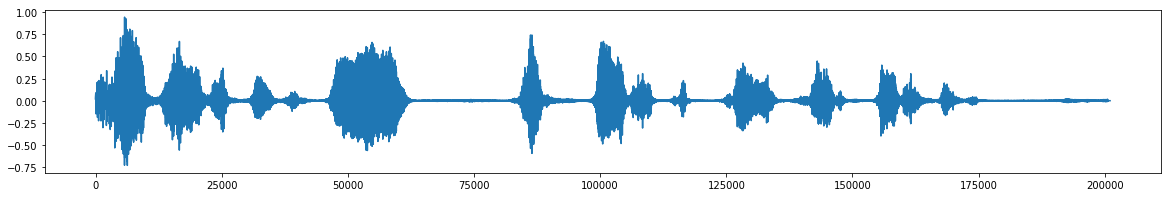

In [19]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [20]:
IPython.display.Audio(data=noise_reduced, rate=rate)